In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
file_path = 'exercises_problem2 (1).parquet'
df = pd.read_parquet(file_path)

In [3]:
df.info

<bound method DataFrame.info of          var1      var2       var3  class
0    2.220386  3.088938   5.309324      1
1   -1.112359  1.838144   0.725785      0
2   -0.687695  1.747231   1.059535      0
3   -2.875016  1.718303  -1.156714      0
4   -2.010930  1.327895  -0.683035      0
..        ...       ...        ...    ...
395  8.812375  2.587172  11.399547      0
396  6.166092  2.921566   9.087658      1
397  5.039676  3.073661   8.113337      1
398  6.300243  2.734210   9.034453      1
399  8.422714  3.173201  11.595915      1

[400 rows x 4 columns]>

In [4]:
classes = df['class'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))
color_map = dict(zip(classes, colors))

In [6]:
def scatter_plot_by_class(x_var, y_var):
    plt.figure(figsize=(8, 6))
    for label in classes:
        subset = df[df['class'] == label]
        plt.scatter(subset[x_var], subset[y_var], label=f"Class {label}", alpha=0.7, color=color_map[label])
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend()
    plt.title(f'Scatter Plot of {x_var} vs {y_var} by Class')
    plt.grid(True)
    plt.show()

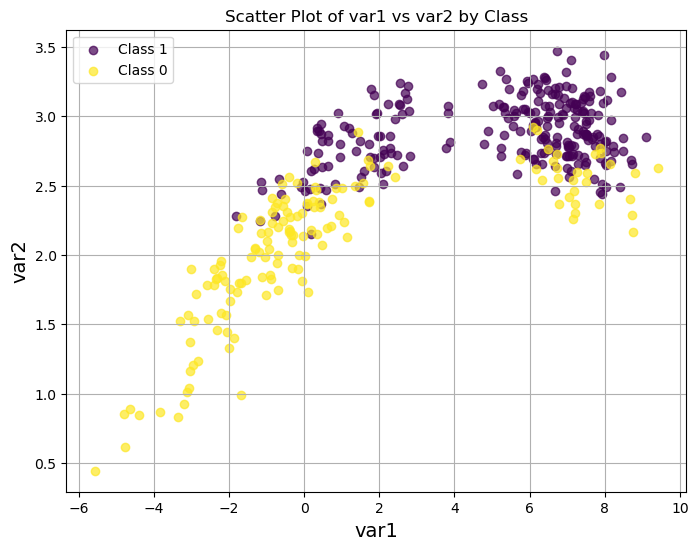

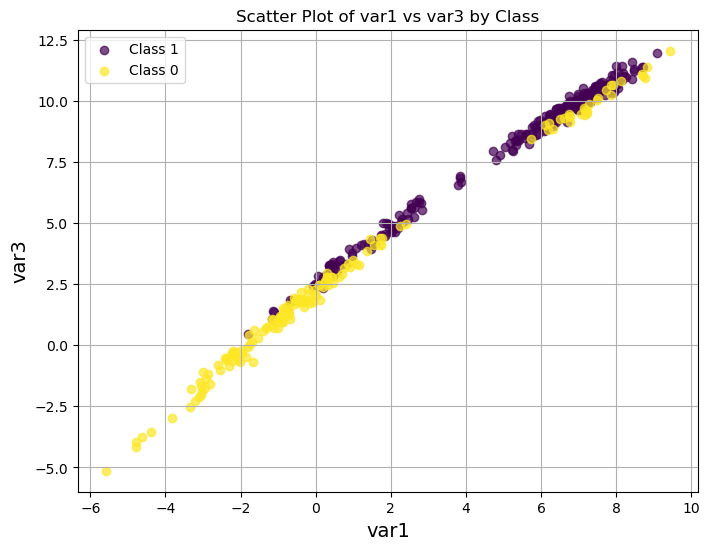

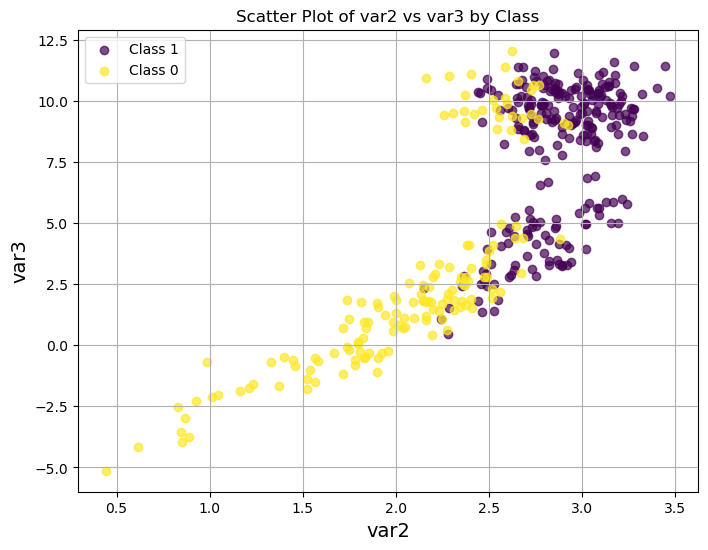

In [7]:
scatter_plot_by_class('var1', 'var2')
scatter_plot_by_class('var1', 'var3')
scatter_plot_by_class('var2', 'var3')

In [8]:
def histogram_by_class(variable):
    plt.figure(figsize=(8, 6))
    bins = np.histogram_bin_edges(df[variable], bins=20)
    for label in classes:
        subset = df[df['class'] == label][variable]
        plt.hist(subset, bins=bins, label=f"Class {label}", alpha=0.5, color=color_map[label], density=True)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()
    plt.title(f'Histogram of {variable} by Class')
    plt.grid(True)
    plt.show()

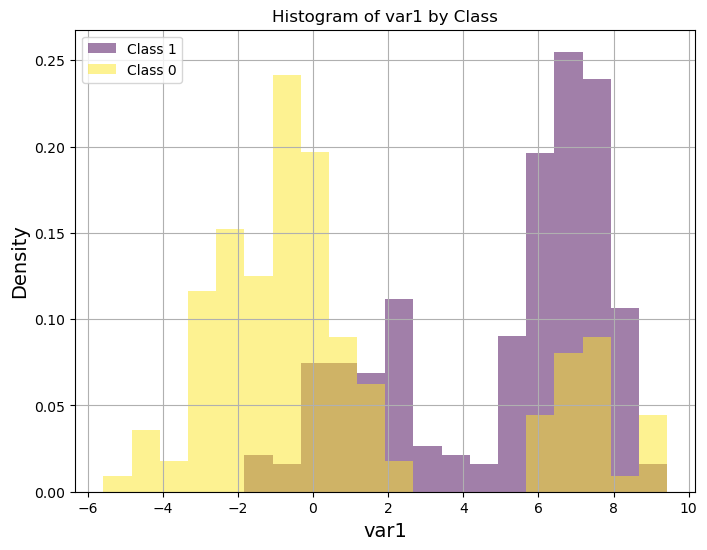

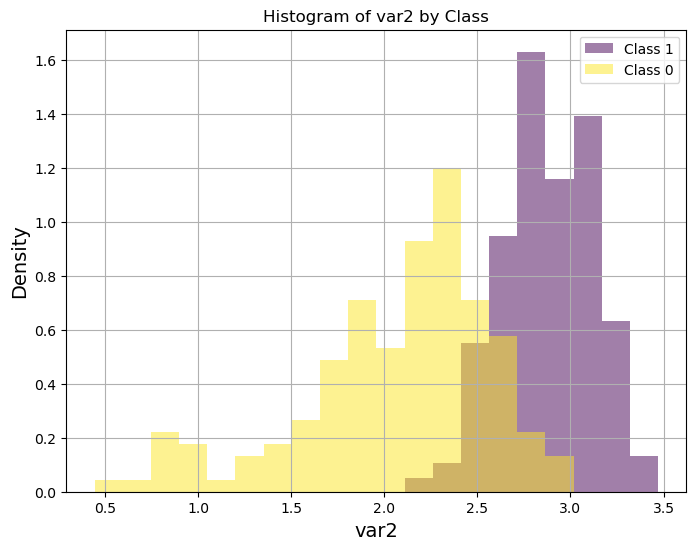

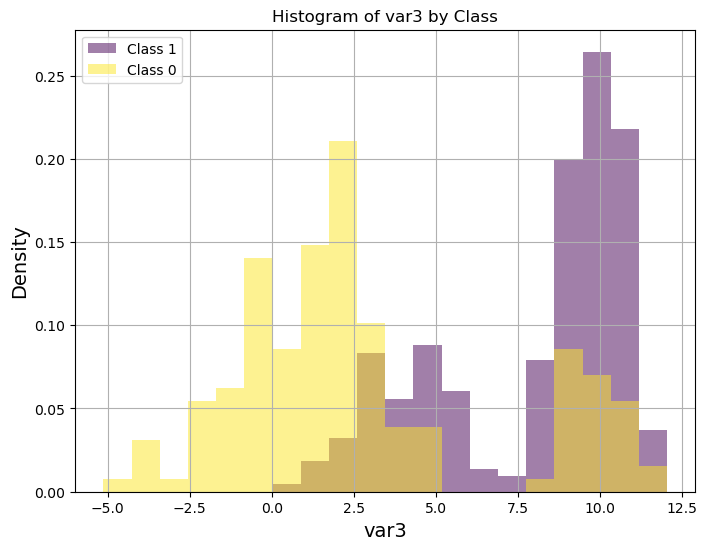

In [9]:
variables = ['var1', 'var2', 'var3']
for var in variables:
    histogram_by_class(var)

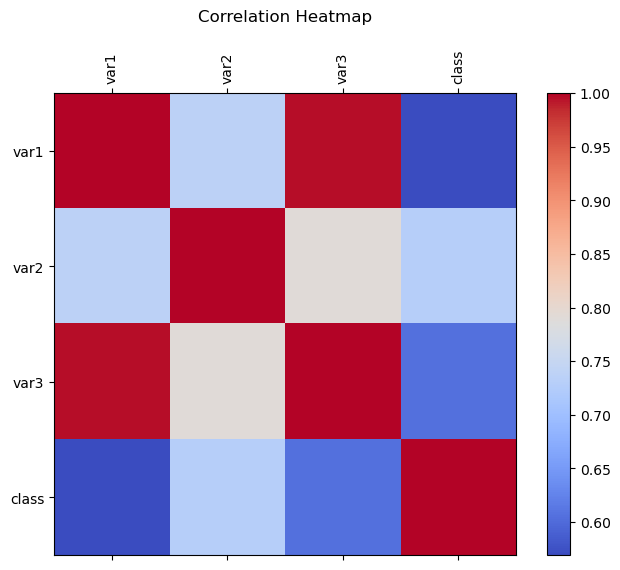

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.set_title('Correlation Heatmap', pad=20)
plt.show()